<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_2_3_Breast_Cancer_Detection_using_SVM_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Setting Up Your Environment

In [36]:
# In this step, we ensure that our Python environment is properly set up.
# We need Python installed on our system to run the code.
# Additionally, we need to install several libraries that we'll use throughout the project.
# These libraries include pandas, numpy, scikit-learn, matplotlib, and seaborn.
# We can install these libraries using pip, which is the Python package installer.


In [37]:
pip install pandas numpy scikit-learn matplotlib seaborn

# Step 2: Loading the Dataset

In [38]:
# Here, we load the Breast Cancer Wisconsin (Diagnostic) Data Set.
# This dataset is commonly used for breast cancer detection tasks.
# We import the load_breast_cancer function from the sklearn.datasets module,
# which provides convenient access to several popular datasets.

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
# After importing the function, we call it to load the dataset into the 'data' variable.

In [41]:
data = load_breast_cancer()

# Step 3: Exploratory Data Analysis (EDA)

In [42]:
# Exploratory Data Analysis (EDA) is a crucial step in any data analysis or machine learning project.
# It helps us understand the structure of the dataset, identify patterns, and detect anomalies.
# In this step, we convert the raw dataset into a pandas DataFrame for easier manipulation and analysis.
# We also compute summary statistics to get an overview of the data and check for missing values.

In [43]:
# Convert to DataFrame for easier manipulation

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [46]:
df['target'] = data.target

In [47]:
# Display the first few rows of the DataFrame

In [48]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [49]:
# Summary statistics

In [50]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [51]:
# Check for missing values

In [52]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [53]:
# Visualizing the Data

In [54]:
# Visualizations play a crucial role in understanding the data.
# They provide insights that may not be apparent from summary statistics alone.
# Here, we use seaborn and matplotlib libraries to create visualizations.
# We plot the distribution of the target variable (malignant or benign tumors) and
# create a correlation matrix heatmap to visualize relationships between features.

In [55]:
import seaborn as sns

In [56]:
import matplotlib.pyplot as plt

In [57]:
# Distribution of target variable

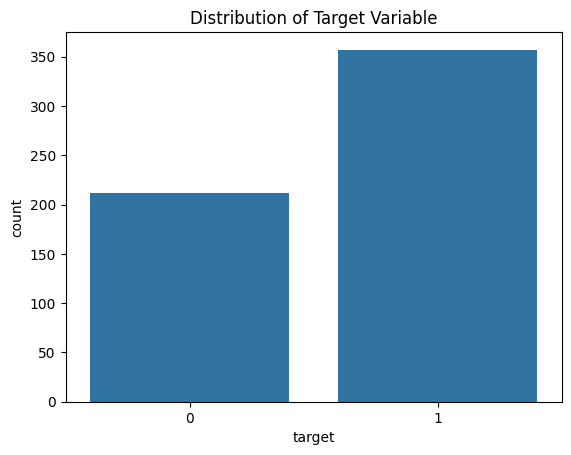

In [58]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [59]:
# Correlation matrix heatmap

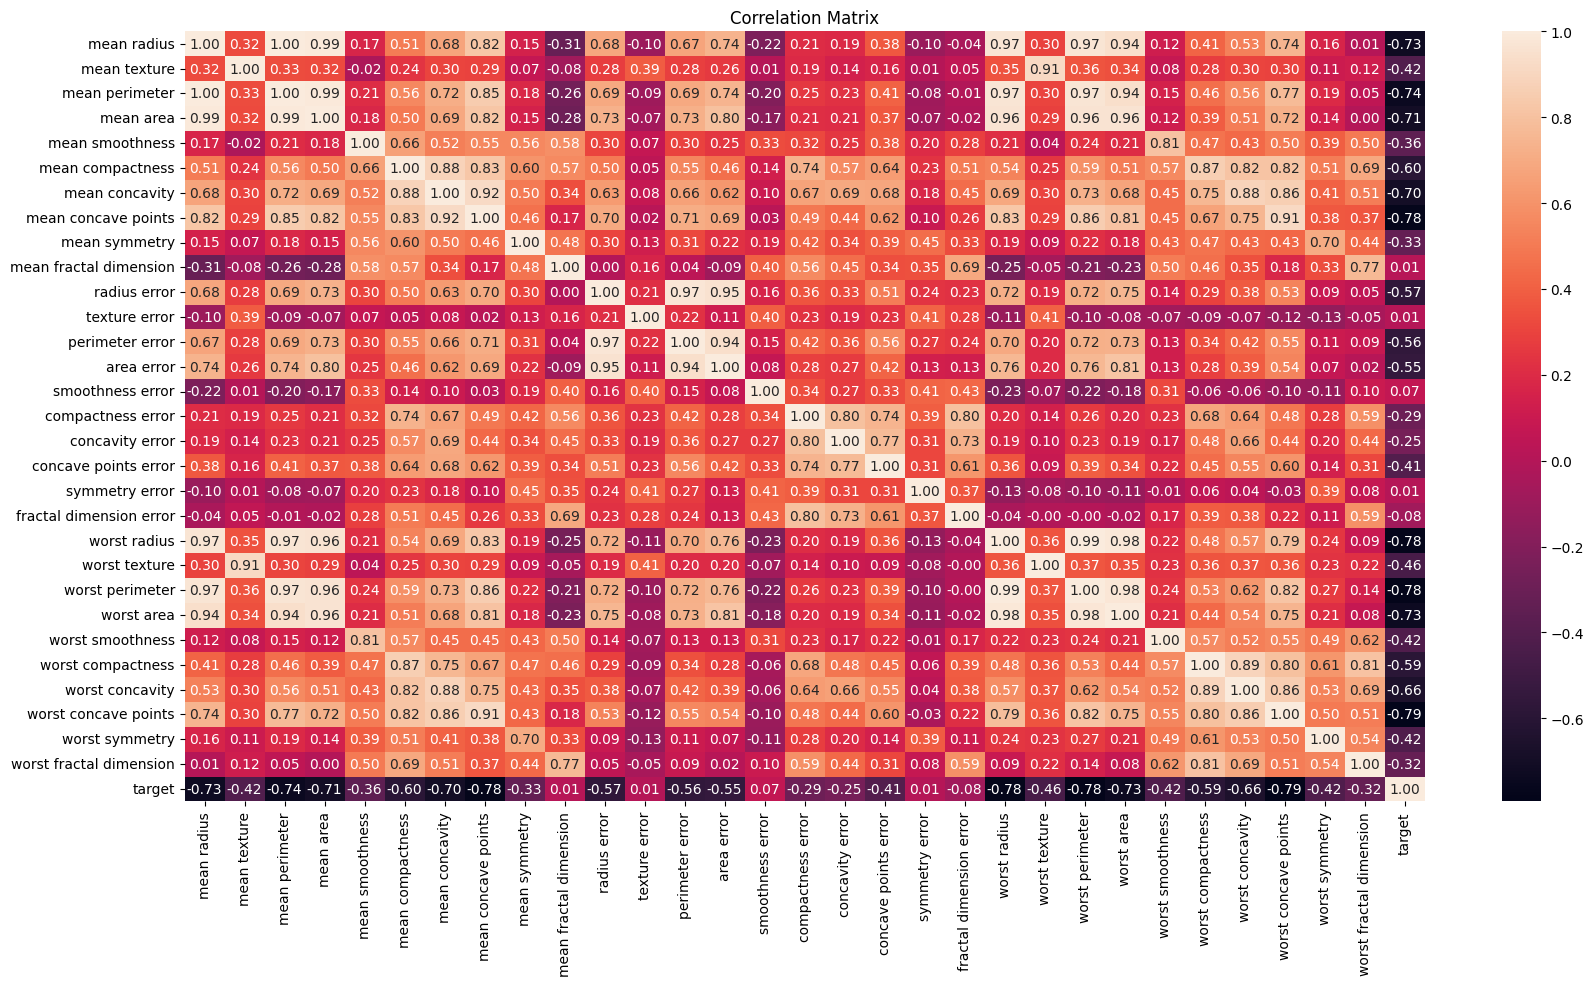

In [60]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [61]:
# Box plots for each feature by target class
# Box plots visualize the distribution of each feature grouped by the target class.
# They show the median, quartiles, and any outliers in the data.

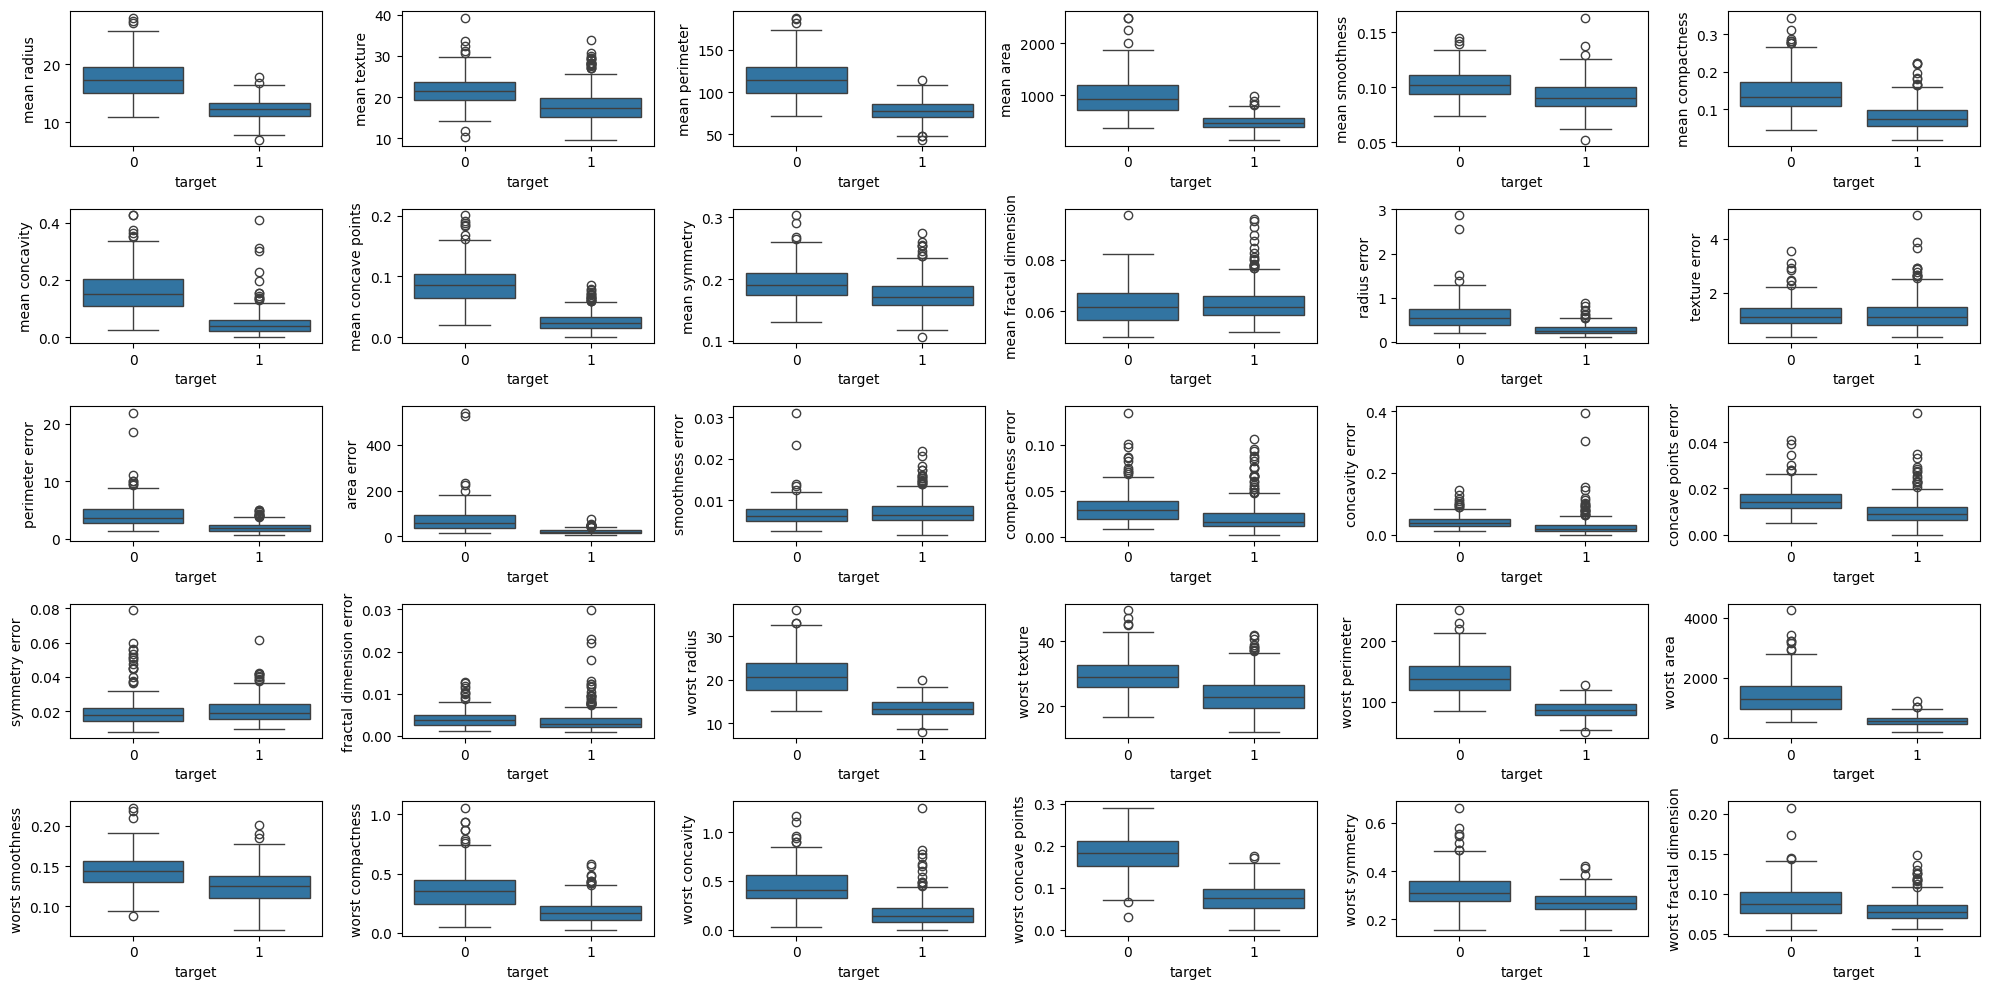

In [62]:
plt.figure(figsize=(20, 10))
for i, feature in enumerate(data.feature_names):
    plt.subplot(5, 6, i+1)
    sns.boxplot(x='target', y=feature, data=df)
plt.tight_layout()
plt.show()

# Step 4: Preparing the Data for Training

In [63]:
# Before training the model, we need to prepare the data.
# This involves splitting the data into features (X) and the target variable (y),
# and then further splitting it into training and test sets.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df.drop('target', axis=1)

In [66]:
y = df['target']

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Training the SVM Model

In [68]:
# In this step, we train a Support Vector Machine (SVM) model on the training data.
# We use scikit-learn's SVC class to create an SVM classifier.
# Additionally, we standardize the data using StandardScaler and create a pipeline
# to streamline the preprocessing steps and model training.

In [69]:
from sklearn.svm import SVC

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.pipeline import make_pipeline

In [72]:
# Create a pipeline that standardizes the data then trains the model

In [73]:
pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))

In [74]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

# Step 6: Evaluating the Model

In [75]:
# After training the model, we need to evaluate its performance on the test set.
# We make predictions using the trained model on the test features (X_test)
# and compare them with the actual target labels (y_test).
# We compute metrics such as confusion matrix and classification report to assess
# the model's performance in terms of accuracy, precision, recall, and F1-score.

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
predictions = pipeline.predict(X_test)

In [78]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 61   2]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Step 7: Improving the Model

In [79]:
# Depending on the initial results, we might want to improve the model's performance
# by tuning its hyperparameters. GridSearchCV from scikit-learn is a useful tool for
# hyperparameter tuning. It searches through a specified grid of hyperparameters
# and selects the best combination based on cross-validation scores.

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01]}

In [82]:
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2)

In [83]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc_

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01]},
             verbose=2)

In [84]:
# Evaluate the best model found by GridSearchCV

In [85]:
best_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, best_predictions))
print(classification_report(y_test, best_predictions))

[[ 61   2]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [87]:
# Save the preprocessed dataset to a CSV file

In [88]:
df.to_csv('preprocessed_breast_cancer_data.csv', index=False)
print("Preprocessed dataset saved successfully.")

Preprocessed dataset saved successfully.
